In [1]:
import sys
sys.path.append('..')
from nature import *
figsize=(width_in_inches*2, height_in_inches)
markersize = 0.1
print('figsize:', figsize, 'fontsize:', fontsize)
plt.rcParams.update({'lines.linewidth': 1, 'lines.markersize': 0.1})

figsize: (6.692913385826772, 3.346456692913386) fontsize: 7


In [2]:
fn_acc = './scaling_imputation_acc.csv'
fn_loss = './scaling_imputation_loss.csv'

c0, c1, c2, c3, c4 = ['red', 'royalblue', 'forestgreen', 'chocolate', 'black' ]
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df_acc = pd.read_csv(fn_acc)
df_loss = pd.read_csv(fn_loss)

df_acc.columns, df_loss.columns


(Index(['Step', 'sample_1M - val_acc_epoch', 'sample_1M - val_acc_epoch__MIN',
        'sample_1M - val_acc_epoch__MAX', 'sample_100k - val_acc_epoch',
        'sample_100k - val_acc_epoch__MIN', 'sample_100k - val_acc_epoch__MAX',
        'sample_10k - val_acc_epoch', 'sample_10k - val_acc_epoch__MIN',
        'sample_10k - val_acc_epoch__MAX', 'sample_2k - val_acc_epoch',
        'sample_2k - val_acc_epoch__MIN', 'sample_2k - val_acc_epoch__MAX'],
       dtype='object'),
 Index(['Step', 'sample_1M - val/loss_epoch', 'sample_1M - val/loss_epoch__MIN',
        'sample_1M - val/loss_epoch__MAX', 'sample_100k - val/loss_epoch',
        'sample_100k - val/loss_epoch__MIN',
        'sample_100k - val/loss_epoch__MAX', 'sample_10k - val/loss_epoch',
        'sample_10k - val/loss_epoch__MIN', 'sample_10k - val/loss_epoch__MAX',
        'sample_2k - val/loss_epoch', 'sample_2k - val/loss_epoch__MIN',
        'sample_2k - val/loss_epoch__MAX'],
       dtype='object'))

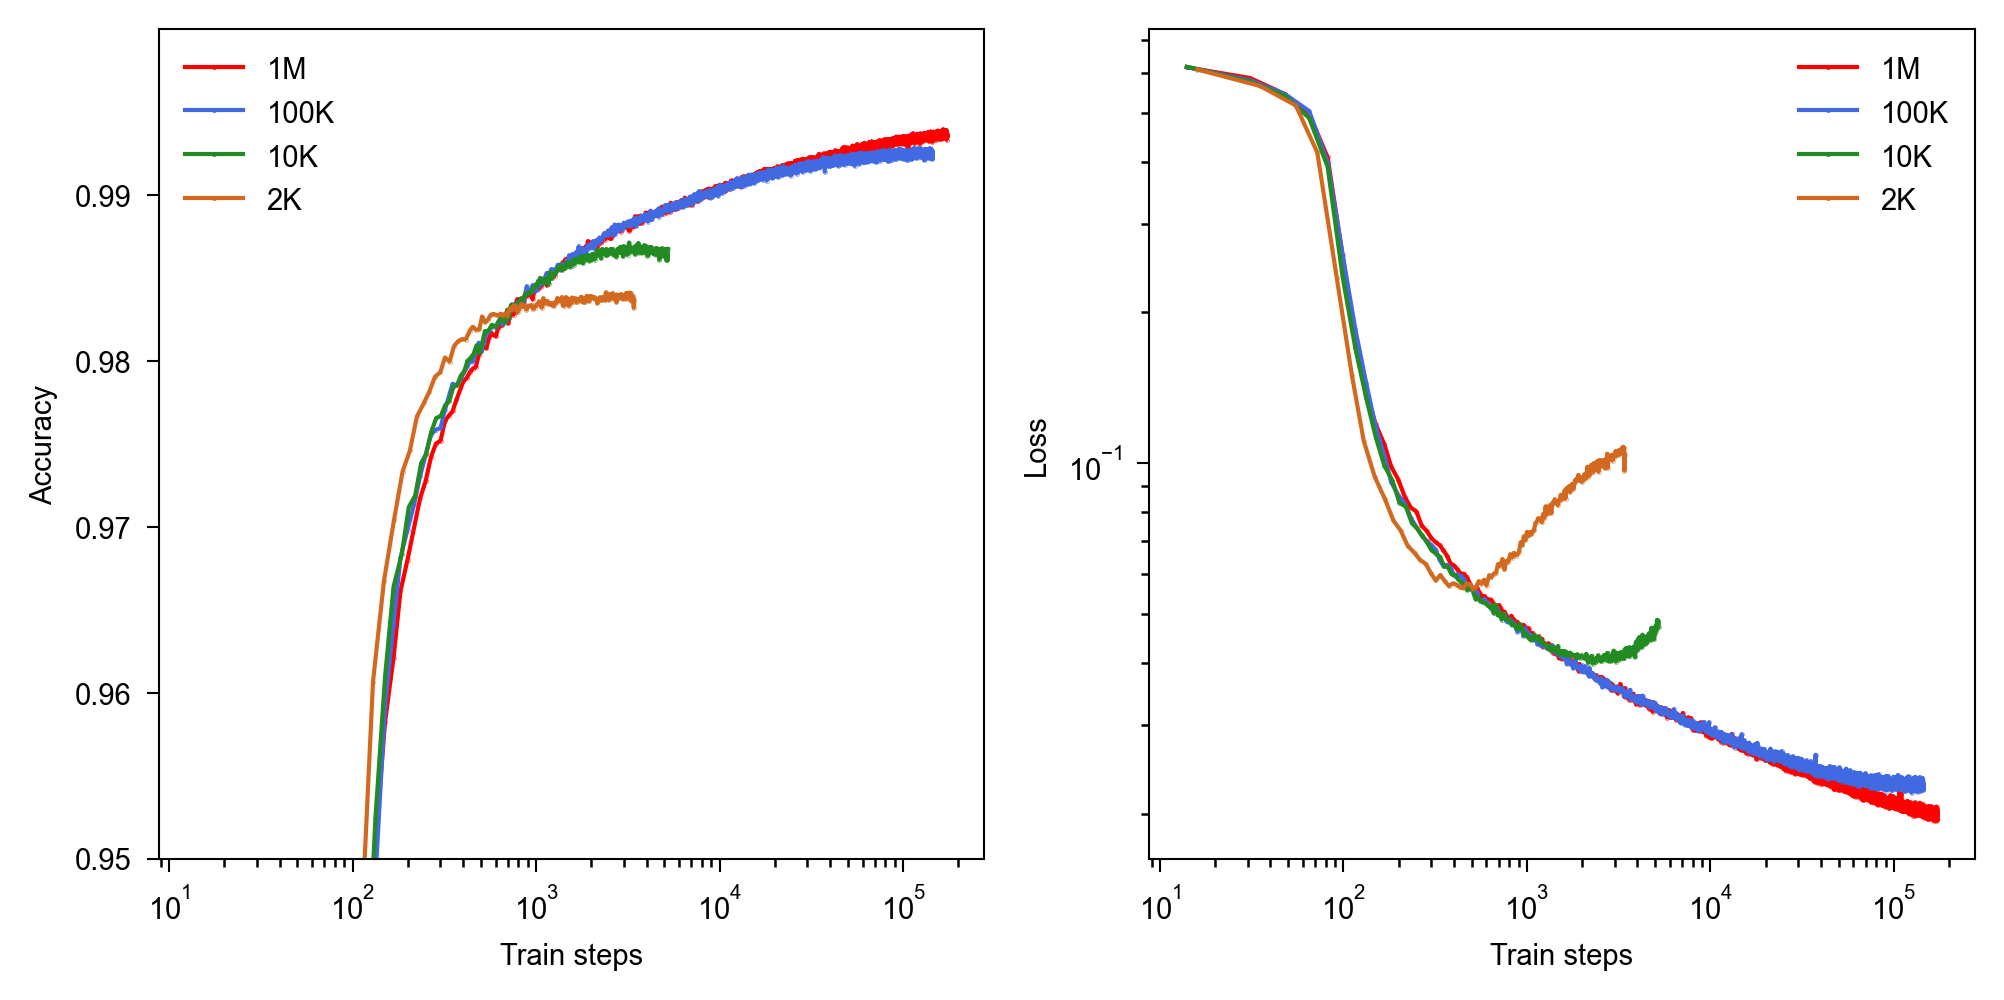

In [3]:

# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=figsize)

# Accuracy subplot
ax = axs[0]

x = df_acc['Step']

y = df_acc['sample_1M - val_acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='1M', color=c0, marker='o', markersize=markersize)

y = df_acc['sample_100k - val_acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='100K', color=c1, marker='o', markersize=markersize)

y = df_acc['sample_10k - val_acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='10K', color=c2, marker='o', markersize=markersize)

y = df_acc['sample_2k - val_acc_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='2K', color=c3, marker='o', markersize=markersize)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0.95, 1)
# ax.set_xlim(100, 1e4)
ax.set_xlabel('Train steps')
ax.set_ylabel('Accuracy')
ax.set_yticks([0.95, 0.96, 0.97, 0.98, 0.99])
ax.tick_params(axis='y')
ax.legend(handlelength=2, handleheight=1, loc='best', markerscale=2)
# ax.set_title('Imputation test')


# Loss subplot
ax = axs[1]
x = df_loss['Step']

y = df_loss['sample_1M - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='1M', color=c0, marker='o', markersize=markersize)

y = df_loss['sample_100k - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='100K', color=c1, marker='o', markersize=markersize)

y = df_loss['sample_10k - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='10K', color=c2, marker='o', markersize=markersize)

y = df_loss['sample_2k - val/loss_epoch']
non_nan_indices = y.index[~y.isna()]
ax.plot(x[non_nan_indices], y[non_nan_indices], label='2K', color=c3, marker='o', markersize=markersize)

ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(100, 1e4)
ax.set_xlabel('Train steps')
ax.set_ylabel('Loss')
# Optionally set y-ticks for log scale if desired
ax.legend(handlelength=2, handleheight=1, loc='best', markerscale=2)
# ax.set_title('Imputation test')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig('scaling_imputation_acc_loss.pdf', bbox_inches='tight')
plt.show()